In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('comments.csv')

In [5]:
df.head()

,id,comment,User id,Photo id,created Timestamp,posted date,emoji used,Hashtags used count
0,1,unde at dolorem,2,1,13-04-2023 08:04,April 14,yes,1
1,2,quae ea ducimus,3,1,13-04-2023 08:04,April 14,no,2
2,3,alias a voluptatum,5,1,13-04-2023 08:04,April 14,no,4
3,4,facere suscipit sunt,14,1,13-04-2023 08:04,April 14,yes,2
4,5,totam eligendi quaerat,17,1,13-04-2023 08:04,April 14,yes,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7488 entries, 0 to 7487
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   7488 non-null   int64 
 1   comment              7488 non-null   object
 2   User  id             7488 non-null   int64 
 3   Photo id             7488 non-null   int64 
 4   created Timestamp    7488 non-null   object
 5   posted date          7488 non-null   object
 6   emoji used           7488 non-null   object
 7   Hashtags used count  7488 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 468.1+ KB


In [11]:
df.isnull().sum()

id                     0
comment                0
User  id               0
Photo id               0
created Timestamp      0
posted date            0
emoji used             0
Hashtags used count    0
dtype: int64

In [15]:
df.shape

(7488, 8)

In [19]:
df.describe()

,id,User id,Photo id,Hashtags used count
count,7488.000000,7488.000000,7488.000000,7488.000000
mean,3744.500000,48.949386,129.099225,2.416667
std,2161.743741,28.354045,73.776439,1.705905
min,1.000000,2.000000,1.000000,0.000000
25%,1872.750000,24.000000,65.000000,1.000000
50%,3744.500000,48.000000,130.000000,2.000000
75%,5616.250000,72.000000,193.000000,3.250000
max,7488.000000,100.000000,257.000000,6.000000


form my dataset the column like id and created timestamp is not required

In [22]:
df.drop(['id','created Timestamp'],axis=1,inplace=True)

In [24]:
df.head()

,comment,User id,Photo id,posted date,emoji used,Hashtags used count
0,unde at dolorem,2,1,April 14,yes,1
1,quae ea ducimus,3,1,April 14,no,2
2,alias a voluptatum,5,1,April 14,no,4
3,facere suscipit sunt,14,1,April 14,yes,2
4,totam eligendi quaerat,17,1,April 14,yes,1


In [46]:
df['emoji used'].value_counts()

emoji used
yes    3744
no     3744
Name: count, dtype: int64

 Q 1. HOW many comments used emojis vs not?


In [38]:
emoji_counts = df['emoji used'].value_counts()

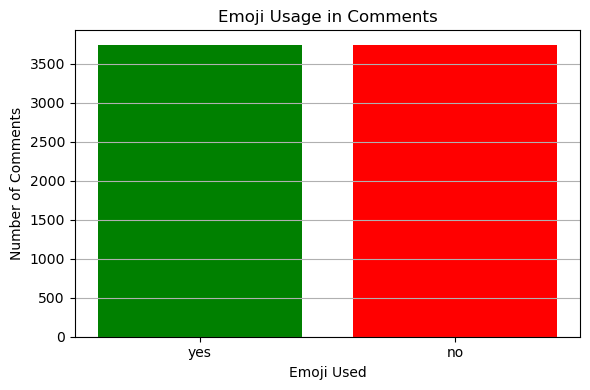

In [44]:
plt.figure(figsize=(6, 4))
plt.bar(emoji_counts.index, emoji_counts.values, color=['green', 'red'])
plt.title("Emoji Usage in Comments")
plt.xlabel("Emoji Used")
plt.ylabel("Number of Comments")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

 Q 2. What is the average hashtag count for emoji vs non-emoji comments?

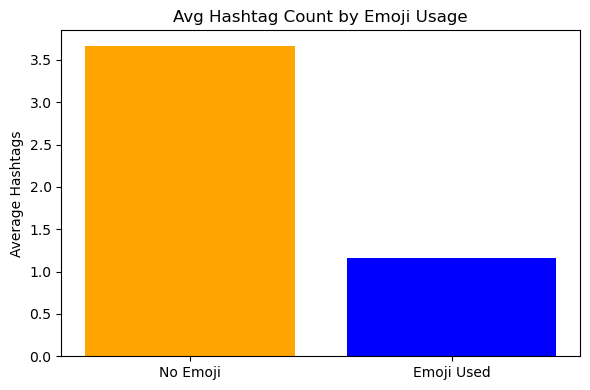

In [49]:
# Convert 'emoji used' to binary
df['emoji used'] = df['emoji used'].map({'yes': 1, 'no': 0})

# Group by emoji usage
avg_hashtags = df.groupby('emoji used')['Hashtags used count'].mean()

# Plot
plt.figure(figsize=(6, 4))
plt.bar(['No Emoji', 'Emoji Used'], avg_hashtags, color=['orange', 'blue'])
plt.title("Avg Hashtag Count by Emoji Usage")
plt.ylabel("Average Hashtags")
plt.tight_layout()
plt.show()


 Q 3. What is the hashtag usage distribution?

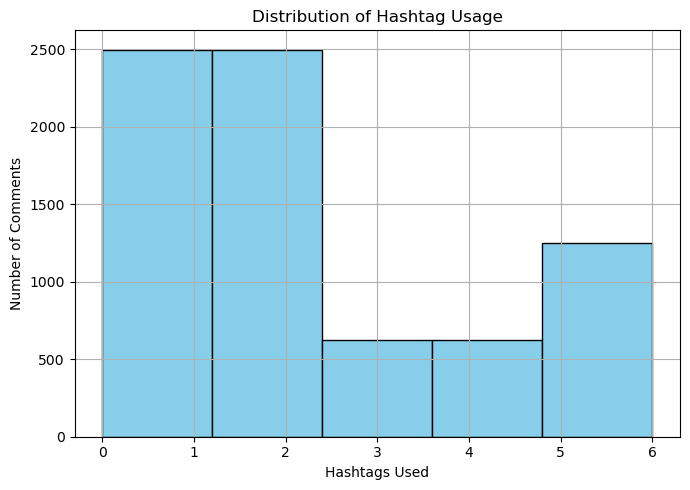

In [63]:
# Plot histogram of hashtags used
plt.figure(figsize=(7, 5))
plt.hist(df['Hashtags used count'], bins=5, color='skyblue', edgecolor='black')
plt.title("Distribution of Hashtag Usage")
plt.xlabel("Hashtags Used")
plt.ylabel("Number of Comments")
plt.grid(True)
plt.tight_layout()
plt.show()


 Q 4.  Which photo has the most comments?

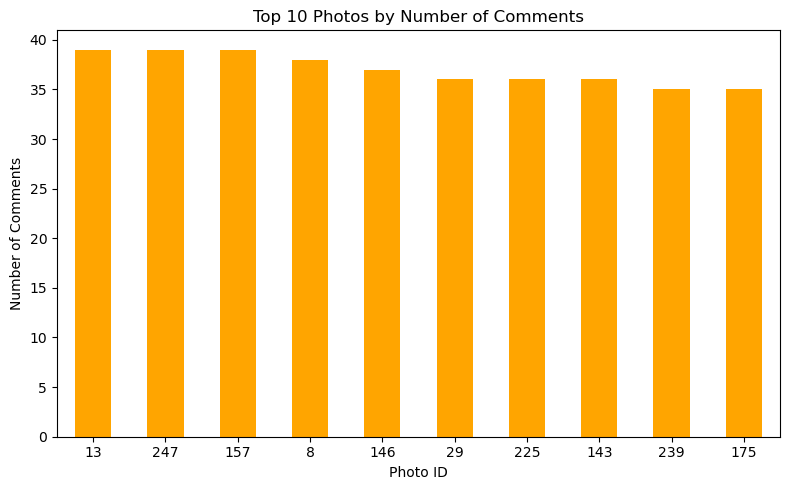

In [61]:
photo_comment_count = df['Photo id'].value_counts().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(8, 5))
photo_comment_count.plot(kind='bar', color='orange')
plt.title("Top 10 Photos by Number of Comments")
plt.xlabel("Photo ID")
plt.ylabel("Number of Comments")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


 Q 5. What’s the frequency of emoji usage by photo ID?

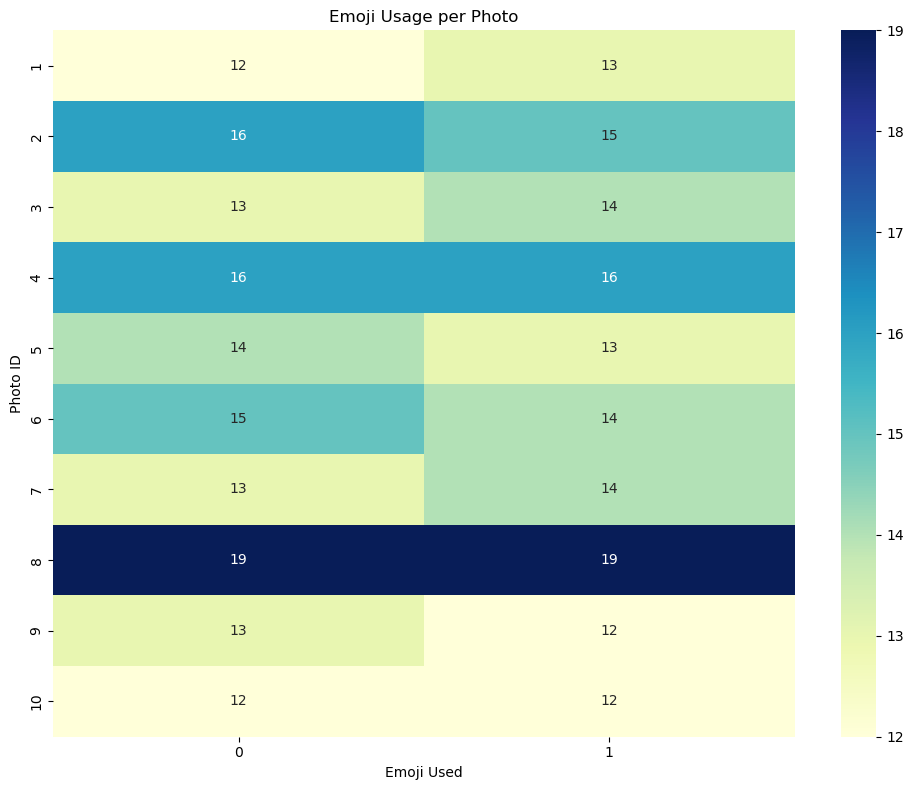

In [73]:
pivot_table = df.pivot_table(index='Photo id', columns='emoji used', aggfunc='size', fill_value=0).head(10)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Emoji Usage per Photo")
plt.xlabel("Emoji Used")
plt.ylabel("Photo ID")
plt.tight_layout()
plt.show()

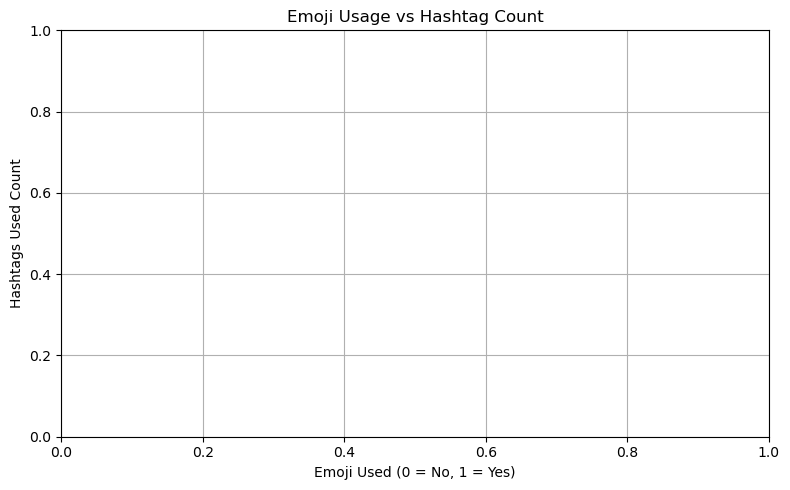